# ZMQ REQ-REP Tests

In [1]:
from real_fast_interactor import RFInteractor

In [2]:
rfi = RFInteractor(ZmqInAddress='tcp://127.0.0.1:5555', ZmqOutAddress=None, verbose=False, path_out='./zmq_out/', name='OFZMQ_test03')

ZMQ Real Time interactor for FAST initialized. 
 PUB-SUB protocol: None | REQ-REP protocol: tcp://127.0.0.1:5555


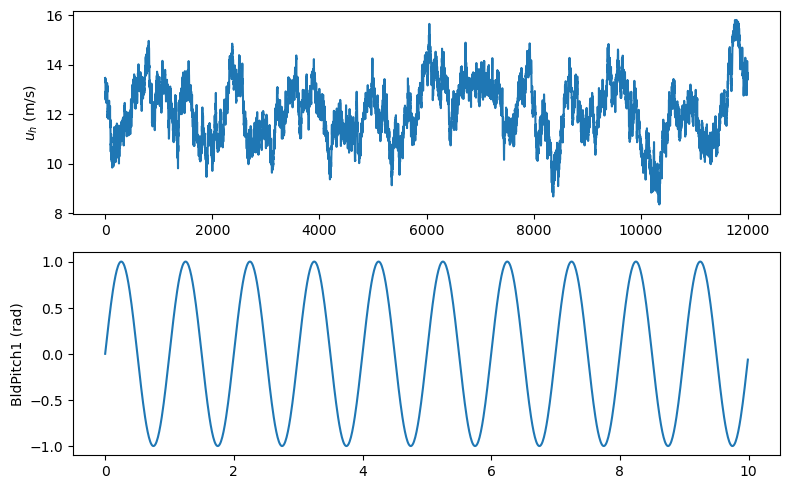

In [3]:
from pyFAST.input_output import FASTOutputFile
import numpy as np 
import matplotlib.pyplot as plt 


t = np.linspace(0, 100, 400)

wind_series = FASTOutputFile('./ex_files/tsim.dat').toDataFrame()['U_[3.40]']

frequency = 1.0  # 1 Hz sinusoidal signal
sampling_rate = 100.0  # Sampling rate of 100 Hz
duration = 10.0  # Duration of the signal
t = np.arange(0, duration, 1 / sampling_rate)  # Time vector
bld_pitch = np.sin(2 * np.pi * frequency * t)  # Example for another series

fig, axs = plt.subplots(2, 1, figsize=(8, 5))
axs[0].plot(wind_series)
axs[0].set_ylabel('$u_h$ (m/s)')

axs[1].plot(t, bld_pitch)
axs[1].set_ylabel('BldPitch1 (rad)')

fig.tight_layout()

In [4]:
import time 

count_sampling = 0
dt_in = 0.5 
dt_wspd = 0.05 

done = False
rfi.cont_req_threshold = 5

while not done:
    
    if count_sampling >= 7000:
        count_sampling = 0   
     
    rep = {
        'VelH': wind_series[count_sampling], 
        'VelV': 0,
        'BlPitchCom1': np.deg2rad(bld_pitch[count_sampling])
        }
           
    done = rfi.fast_rep(rep, verbose=True)
    count_sampling += 1
    time.sleep(0.1)

Response sent: 13.459;0;0.0;
Response sent: 13.452;0;0.0010959013048243186;
Response sent: 13.281;0;0.0021874775878681775;
Response sent: 13.445;0;0.0032704208962361686;
Response sent: 13.351;0;0.004340457347439902;
Response sent: 13.301;0;0.005393363996459629;
Response sent: 13.208;0;0.006424985501778961;
Response sent: 12.615;0;0.007431250524619439;
Response sent: 12.577;0;0.008408187796654669;
Response sent: 12.888;0;0.009351941792792112;
Response sent: 12.776;0;0.010258787947169204;
Response sent: 12.88;0;0.011125147352313217;
Response sent: 12.935;0;0.011947600883454012;
Response sent: 12.893;0;0.012722902692247453;
Response sent: 12.641;0;0.013447993016655935;
Response sent: 12.687;0;0.014120010256431278;
Response sent: 12.909;0;0.01473630226654356;
Response sent: 12.859;0;0.015294436823985909;
Response sent: 13.05;0;0.01579221122664752;
Response sent: 12.941;0;0.01622766098637258;
Response sent: 12.959;0;0.016599067581897532;
Response sent: 12.861;0;0.016904965241069367;
Respons

In [24]:
rfi.fast_rep(
    {
        'VelH': wind_series[count_sampling] + 4, 
        'VelV': wind_series[count_sampling]/2,
        'BlPitchCom1': bld_pitch[count_sampling]
        }, 
verbose=True)

Request received: VelH;VelV;BldPitchCom1;


In [5]:
from openfast_toolbox.io import FASTOutputFile

fastout = FASTOutputFile('../templatesDir/OFZMQ_test03/OFZMQ_test03.outb').toDataFrame()

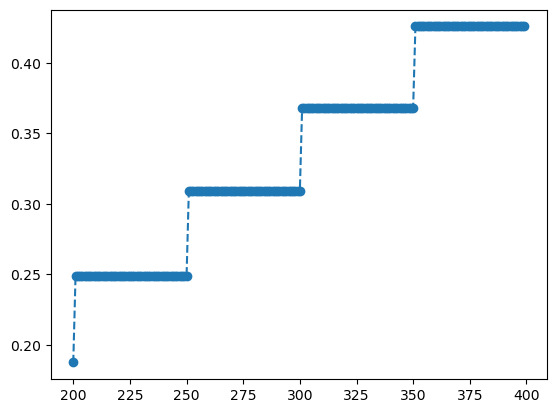

In [8]:
# plt.plot(fastout['Wind1VelX_[m/s]'])
# plt.plot(wind_series[::10])
plt.plot(fastout['BlPitchC1_[deg]'][200:400], ls='--', marker='o')#, ls='--', marker='o')
# plt.plot(fastout['Time_[s]'][50:150], np.rad2deg(bld_pitch[50:150]), ls='--', marker='o')#, ls='--', marker='o')

In [5]:
from pyFAST.input_output import FASTOutputFile

test03 = FASTOutputFile('../templatesDir/OFZMQ_test04/OFZMQ_test04.outb').toDataFrame()

<Axes: >

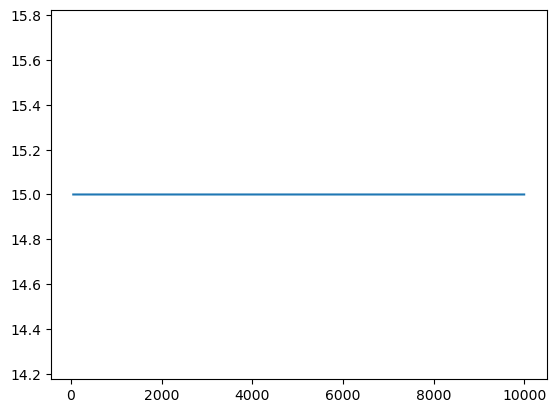

In [7]:
test03['BlPitchC1_[deg]'][50:].plot()

In [9]:
import pickle 

with open('../subscribed_messages.pkl', 'rb') as f:
    tmp = pickle.load(f)

In [10]:
tmp.keys()

dict_keys(['TurbId', ' Time', ' Wind1VelX_(m/s)', ' Azimuth_(deg)', ' GenTq_(kN-m)', ' GenPwr_(kW)'])

In [12]:
len(tmp[' Wind1VelX_(m/s)'])

9999

In [14]:
import numpy as np

np.allclose(fastout['Wind1VelX_[m/s]'], tmp[' Wind1VelX_(m/s)'])

NameError: name 'fastout' is not defined